In [2]:
# Import everything we need
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Shape of dataset: (768, 10)
Data types and first few rows:
 # Relative Compactness       float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                  float64
Glazing Area                 float64
Glazing Area Distribution    float64
Heating Load                 float64
Cooling Load                 float64
dtype: object    # Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.90         563.5      318.5     122.50             7.0   
4                    0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load

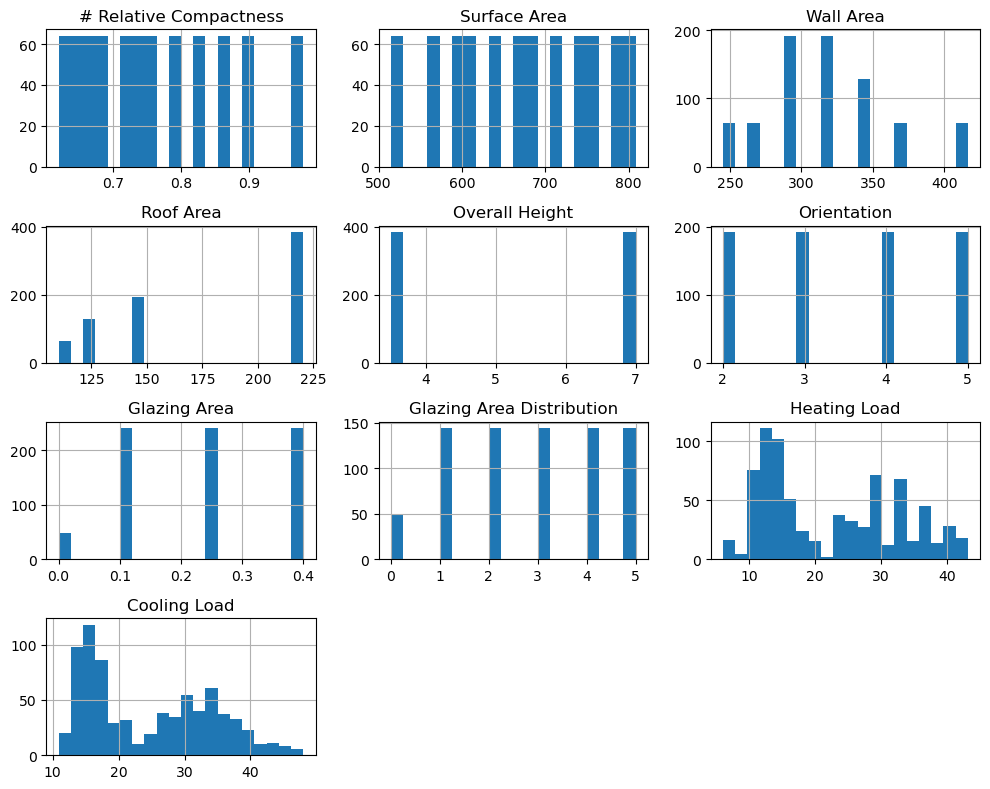

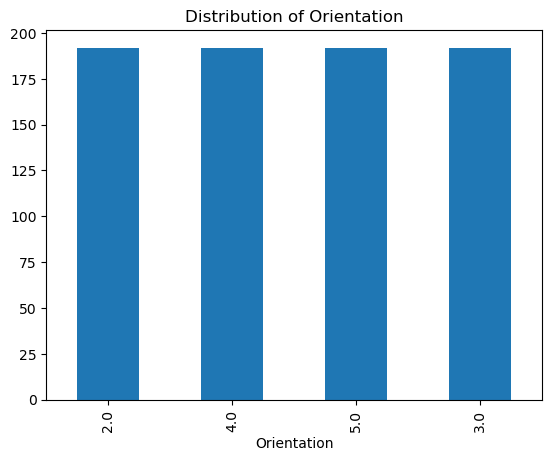

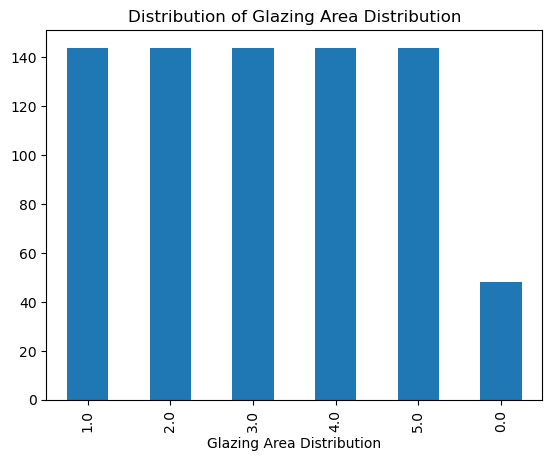

Correlation matrix:
                            # Relative Compactness  Surface Area     Wall Area  \
# Relative Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface Area                        -9.919015e-01  1.000000e+00  1.955016e-01   
Wall Area                           -2.037817e-01  1.955016e-01  1.000000e+00   
Roof Area                           -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall Height                       8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                          4.357512e-17  2.793819e-16  3.957426e-17   
Glazing Area                         3.569803e-15  2.896830e-15  1.900780e-16   
Glazing Area Distribution            1.090094e-15  9.211165e-16  2.385022e-16   
Heating Load                         6.222722e-01 -6.581202e-01  4.556712e-01   
Cooling Load                         6.343391e-01 -6.729989e-01  4.271170e-01   

                              Roof Area  Overall Height   Orientation  \
# Relative Com

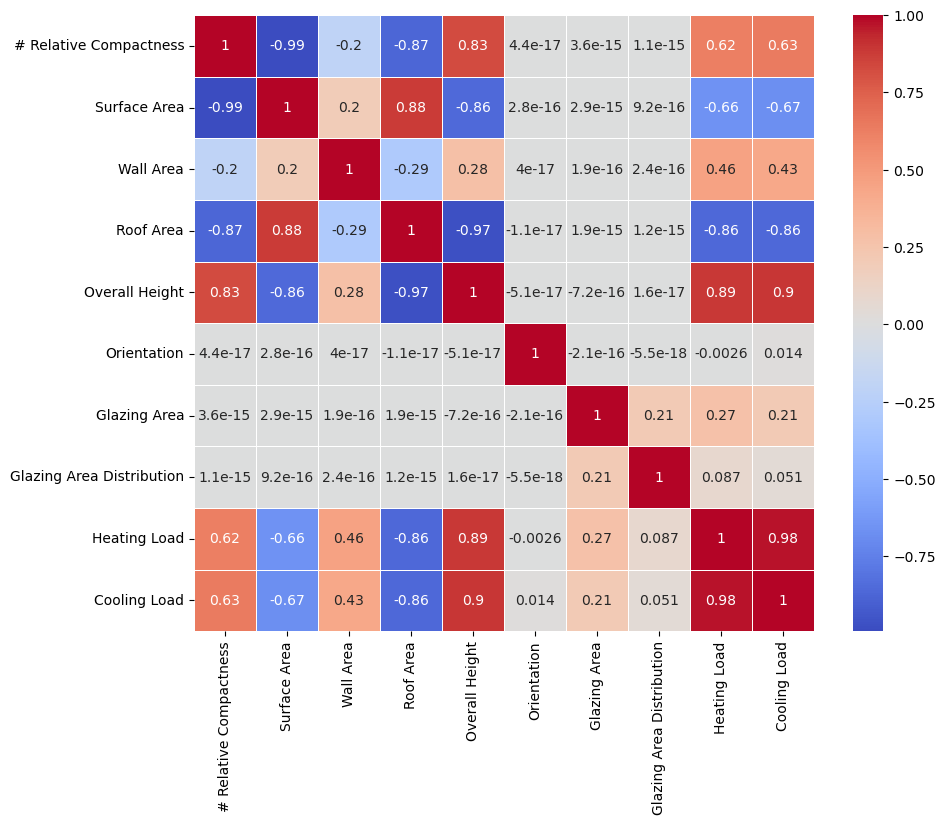

Heating Load Distribution:
 count    768.000000
mean      22.307201
std       10.090196
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Heating Load, dtype: float64


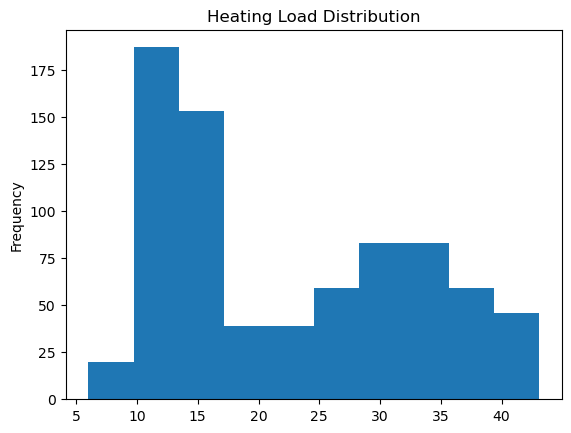

Cooling Load Distribution:
 count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Cooling Load, dtype: float64


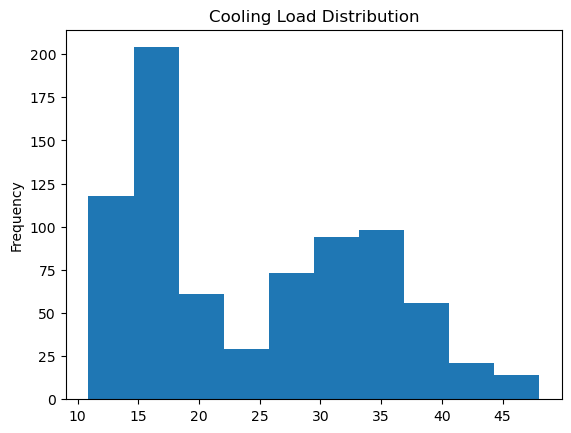

Data after one-hot encoding:
    # Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.90         563.5      318.5     122.50             7.0   
4                    0.90         563.5      318.5     122.50             7.0   

   Glazing Area  Heating Load  Cooling Load  Orientation_2.0  Orientation_3.0  \
0           0.0         15.55         21.33             True            False   
1           0.0         15.55         21.33            False            False   
2           0.0         15.55         21.33            False            False   
3           0.0         20.84         28.28             True            False   
4           0.0         21.46         25.38            False             True 

In [17]:
# To understand this dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('./Resources/2024_energy_efficiency_data.csv')

# 1. Initial inspection
print("Shape of dataset:", data.shape)
print("Data types and first few rows:\n", data.dtypes, data.head())

# 2. Check for missing data
missing_data = data.isnull().sum()
print("Missing data in each column:\n", missing_data)

# 3. Summary statistics for numerical features
print("Summary statistics for numerical features:\n", data.describe())

# 4. Unique values in categorical features
categorical_cols = ['Orientation', 'Glazing Area Distribution']
for col in categorical_cols:
    print(f"Unique values in {col}:", data[col].unique())
    print(f"Value counts in {col}:\n", data[col].value_counts())

# 5. Visualizing distributions
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Bar plot for categorical features
for col in categorical_cols:
    data[col].value_counts().plot(kind='bar', title=f'Distribution of {col}')
    plt.show()

# 6. Correlation matrix
corr_matrix = data.corr()
print("Correlation matrix:\n", corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

# 7. Target distribution (Heating Load, Cooling Load)
print("Heating Load Distribution:\n", data['Heating Load'].describe())
data['Heating Load'].plot(kind='hist', title='Heating Load Distribution')
plt.show()

print("Cooling Load Distribution:\n", data['Cooling Load'].describe())
data['Cooling Load'].plot(kind='hist', title='Cooling Load Distribution')
plt.show()

# 8. One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=['Orientation', 'Glazing Area Distribution'], prefix=['Orientation', 'GlazingAreaDist'])
print("Data after one-hot encoding:\n", data_encoded.head())


In [3]:
# 1. Load data and preprocessing data
data = pd.read_csv("./Resources/2024_energy_efficiency_data.csv")

# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)

# One hot
data = pd.get_dummies(
    data,
    columns=["Orientation", "Glazing Area Distribution"],
    prefix=["Orientation", "GlazingAreaDist"],
    dtype=int,
)

# Split to X and Y
X = data.drop(columns=["Heating Load", "Cooling Load"])
Y = data[["Heating Load", "Cooling Load"]]

# Scale data to range of [0, 1]
to_scale = [
    "# Relative Compactness",
    "Surface Area",
    "Wall Area",
    "Roof Area",
    "Overall Height",
    "Glazing Area",
]

for category in to_scale:
    X[category] = (X[category] - X[category].min()) / (X[category].max() - X[category].min())

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [4]:
# Create functions to train model
# Initialize weights and biases
def initialize_weights(input_dim, hidden_dim, output_dim):
    # Randomly initialize weights and biases for each layer
    W1 = np.random.uniform(-1/np.sqrt(input_dim), 1/np.sqrt(input_dim), (input_dim, hidden_dim))
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.uniform(-1/np.sqrt(hidden_dim), 1/np.sqrt(hidden_dim), (hidden_dim, output_dim))
    b2 = np.zeros((1, output_dim))
    
    return W1, b1, W2, b2

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative (used in backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# ReLU derivative (for backpropagation)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1  # Linear combination for hidden layer
    A1 = relu(Z1)            # Apply ReLU activation in hidden layer
    Z2 = np.dot(A1, W2) + b2  # Linear combination for output layer
    A2 = Z2                   # No activation for regression (or sigmoid for classification)
    return Z1, A1, Z2, A2

# Backward propagation for regression
def backward_propagation(X, Y, Z1, A1, Z2, A2, W2):
    m = X.shape[0]  # Number of samples
    dZ2 = A2 - Y  # Derivative of cost function (Mean Squared Error for regression)
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)  # Derivative for ReLU activation
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0)
    
    return dW1, db1, dW2, db2


# Update weights and biases
def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Save weights and biases
def save_parameters(W1, b1, W2, b2):
    file_path = "./Parameters"
    np.save(f"{file_path}/W1.npy",W1)
    np.save(f"{file_path}/W2.npy",W2)
    np.save(f"{file_path}/b1.npy",b1)
    np.save(f"{file_path}/b2.npy",b2)


In [11]:
# Train the model
def train(X, Y, input_dim, hidden_dim, output_dim, epochs, learning_rate, train_losses, X_test, Y_test, test_losses):
    # Initialize weights
    W1, b1, W2, b2 = initialize_weights(input_dim, hidden_dim, output_dim)
    
    for i in range(epochs):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        
        # Calculate loss (MSE for regression)
        loss = np.mean((A2 - Y) ** 2)
        
        # Saving training losses to plot learning curve
        train_losses.append(loss)

        if (i % 500 == 0):
            print(f'Epoch {i+1}/{epochs}, Loss: {loss}')

        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, Z2, A2, W2)
        
        # Update weights
        W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        # Test every single version
        _, _, _, Y_pred_heating = forward_propagation(X_test, W1, b1, W2, b2)
        test_loss = np.mean((Y_pred_heating - Y_test) ** 2)
        test_losses.append(test_loss)

    
    return W1, b1, W2, b2

In [36]:
# Train Processing
input_dim = X_train.shape[1]  # Number of features
hidden_dim = 8  # Example hidden layer size (you can adjust this)
output_dim = 1  # Predicting one continuous value (Heating Load)
epochs = 20000  # You can adjust the number of epochs
learning_rate = 0.01  # Learning rate for gradient descent
train_losses = []
test_losses = []

# Train the model
W1, b1, W2, b2 = train(X_train, Y_train['Heating Load'].values.reshape(-1, 1),
                       input_dim, hidden_dim, output_dim, epochs, learning_rate, train_losses, X_test, Y_test[["Heating Load"]], test_losses)

# Save all weights and biases
save_parameters(W1, b1, W2, b2)

Epoch 1/20000, Loss: 596.0679081036812
Epoch 501/20000, Loss: 8.212107409264885
Epoch 1001/20000, Loss: 7.93873813750498
Epoch 1501/20000, Loss: 7.671978450137156
Epoch 2001/20000, Loss: 7.228050447803176
Epoch 2501/20000, Loss: 6.835982041777653
Epoch 3001/20000, Loss: 6.682789093110014
Epoch 3501/20000, Loss: 6.631863478243645
Epoch 4001/20000, Loss: 6.594457015793219
Epoch 4501/20000, Loss: 6.411116832437843
Epoch 5001/20000, Loss: 6.131923478396156
Epoch 5501/20000, Loss: 5.881600099723954
Epoch 6001/20000, Loss: 5.633503112260304
Epoch 6501/20000, Loss: 5.392630594999265
Epoch 7001/20000, Loss: 5.182512042609925
Epoch 7501/20000, Loss: 5.0039478577384875
Epoch 8001/20000, Loss: 4.841978953224815
Epoch 8501/20000, Loss: 4.684421097401778
Epoch 9001/20000, Loss: 4.5777901552180875
Epoch 9501/20000, Loss: 4.500324845530632
Epoch 10001/20000, Loss: 4.445962327207944
Epoch 10501/20000, Loss: 4.403752090034656
Epoch 11001/20000, Loss: 4.367229920868953
Epoch 11501/20000, Loss: 4.3344036

In [ ]:
# Train model for Cooling Load
W1, b1, W2, b2 = train(X_train, Y_train['Cooling Load'].values.reshape(-1, 1),
                       input_dim, hidden_dim, output_dim, epochs, learning_rate)

# Make predictions on the test set for Cooling Load
_, _, _, Y_pred_cooling = forward_propagation(X_test, W1, b1, W2, b2)

# Evaluate the performance using MSE
mse_cooling = mean_squared_error(Y_test['Cooling Load'], Y_pred_cooling)
print(f'Cooling Load - Mean Squared Error (MSE) on Test Set: {mse_cooling}')


In [38]:
# Question 1-a: Predict Heating Load, Evaluate performance using RMSE for Training Data and Test Data  
_, _, _, Y_pred_heating_test = forward_propagation(X_test, W1, b1, W2, b2)
_, _, _, Y_pred_heating_train = forward_propagation(X_train, W1, b1, W2, b2)

[[23.05008857]
 [36.10427655]
 [15.96331848]
 [34.97380685]
 [14.80450905]
 [14.47590677]
 [29.56846085]
 [ 9.276445  ]
 [ 5.40806216]
 [11.42558924]
 [13.28507846]
 [28.73679684]
 [28.34800715]
 [35.23199833]
 [14.39097688]
 [13.67049055]
 [32.11828635]
 [15.13650468]
 [37.18015419]
 [40.75267475]
 [16.06858971]
 [13.25979045]
 [16.67966876]
 [14.40844334]
 [27.78981099]
 [31.59343863]
 [11.89746758]
 [13.45638517]
 [36.01100504]
 [26.41411348]
 [14.95273786]
 [13.1485275 ]
 [14.56228359]
 [15.83956441]
 [12.83993675]
 [33.44999504]
 [28.53235679]
 [32.73599343]
 [16.01567869]
 [29.95817524]
 [40.10847539]
 [34.30825315]
 [12.56370375]
 [28.7177941 ]
 [20.22752273]
 [14.07389263]
 [13.48197611]
 [ 8.75252737]
 [32.42687708]
 [32.19080508]
 [16.79568856]
 [10.51202476]
 [31.82266121]
 [16.90695151]
 [39.86684223]
 [28.66516405]
 [12.41556209]
 [32.15583471]
 [13.46552766]
 [13.79867007]
 [39.55042781]
 [12.46915129]
 [39.99699524]
 [32.4847566 ]
 [14.06309749]
 [14.23266217]
 [14.14702

Heating Load - Mean Squared Error (MSE) on Test Set: 3.773533961743512
Heating Load - Root Mean Squared Error (RMSE) on Test Set: 1.9425586121771234
Heating Load - Mean Squared Error (MSE) on Test Set: 4.0001401038768405
Heating Load - Root Mean Squared Error (RMSE) on Test Set: 2.000035025662511


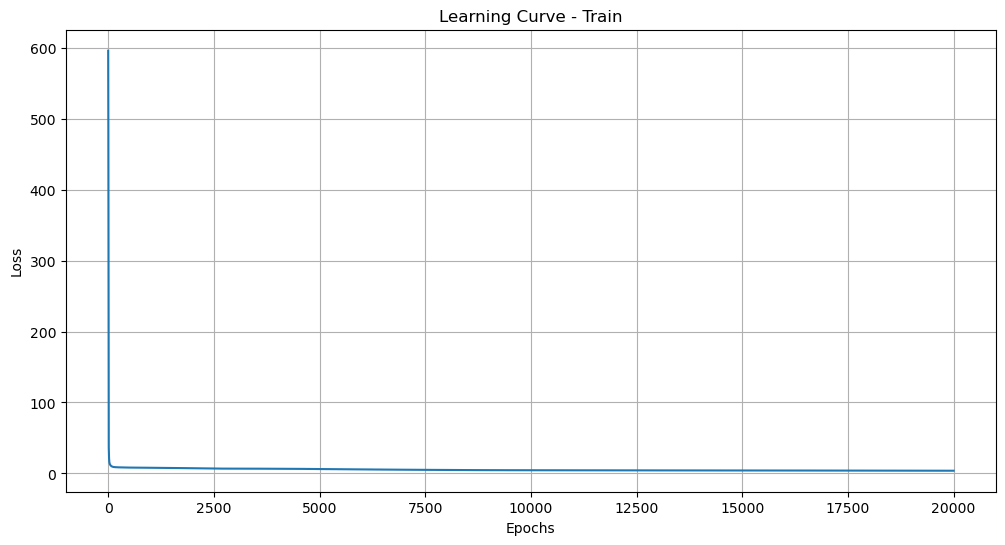

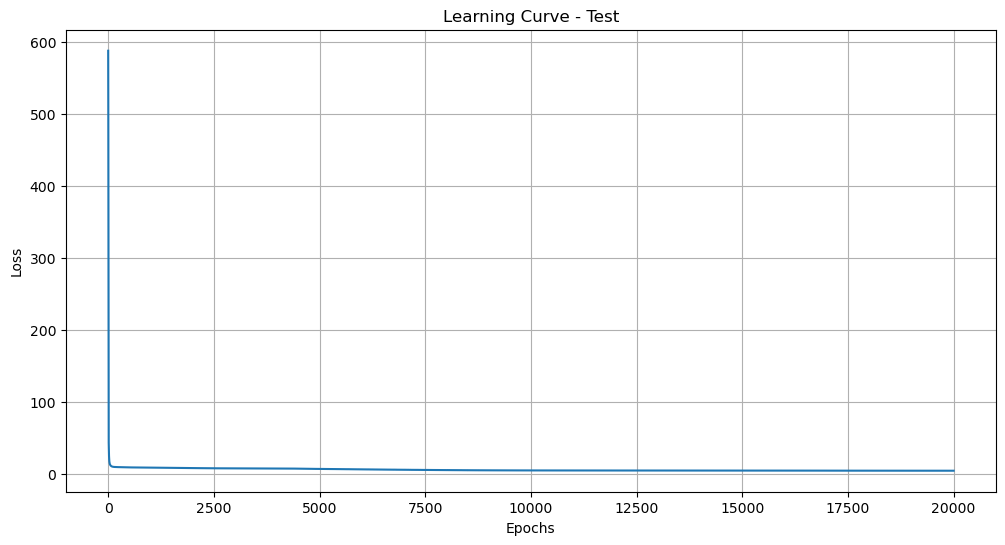

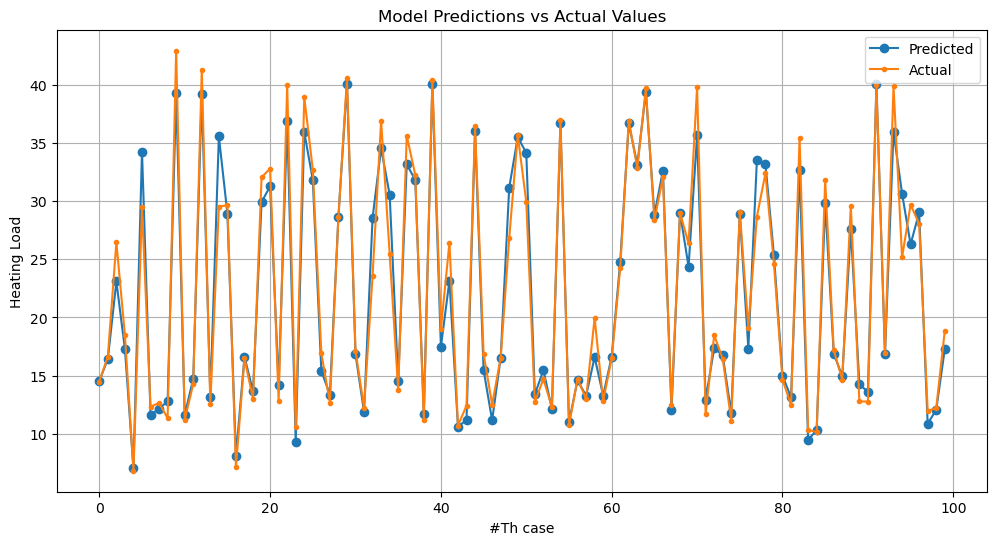

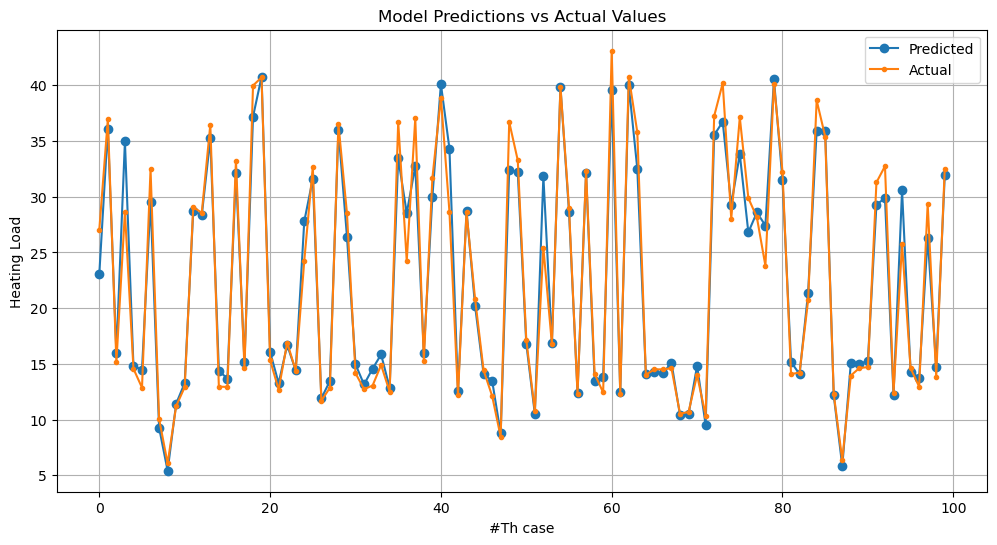

In [67]:
# Question 1-b: 
# Evaluate the performance for TRAIN using Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
mse_heating = mean_squared_error(Y_train['Heating Load'], Y_pred_heating_train)
print(f'Heating Load - Mean Squared Error (MSE) on Test Set: {mse_heating}')
print(f'Heating Load - Root Mean Squared Error (RMSE) on Test Set: {np.sqrt(mse_heating)}')

# Evaluate the performance for TEST using Mean Squared Error (RMSE)
mse_heating = mean_squared_error(Y_test['Heating Load'], Y_pred_heating_test)
print(f'Heating Load - Mean Squared Error (MSE) on Test Set: {mse_heating}')
print(f'Heating Load - Root Mean Squared Error (RMSE) on Test Set: {np.sqrt(mse_heating)}')

import matplotlib.pyplot as plt

# Visualize the learning curve (TRAIN DATA) 
plt.figure(figsize=(12, 6))
plt.plot(train_losses)
plt.title("Learning Curve - Train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Visualize the learning curve (TEST DATA) 
plt.figure(figsize=(12, 6))
plt.plot(test_losses)
plt.title("Learning Curve - Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Number of cases - For clearer visualize
cases = 100

# Regression result with training labels
plt.figure(figsize=(12, 6))
plt.plot(Y_pred_heating_train.flatten()[:cases], label="Predicted", linestyle='-', marker='o')
plt.plot(Y_train["Heating Load"].values[:cases], label="Actual", linestyle='-', marker='.')
plt.title("Model Predictions vs Actual Values")
plt.xlabel("#Th case")
plt.ylabel("Heating Load")
plt.legend()
plt.grid(True)
plt.show()

# Regression result with testing labels
plt.figure(figsize=(12, 6))
plt.plot(Y_pred_heating_test.flatten()[:cases], label="Predicted", linestyle='-', marker='o')
plt.plot(Y_test["Heating Load"].values[:cases], label="Actual", linestyle='-', marker='.')
plt.title("Model Predictions vs Actual Values")
plt.xlabel("#Th case")
plt.ylabel("Heating Load")
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Try to reshape - Just for ensure the type of data before we visualize them (Optional)
print(Y_pred_heating_test.flatten().shape)
print(Y_test["Heating Load"].values.shape)

(192,)
(192,)
